In [308]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import string

matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['font.size'] = 10
fontsize = 10

blue, orange, purple, green, red, brown = '#3b4f8b', '#F07A00', '#83639f', '#8ADFBE', '#D7281A', '#C6826B'
yellow = '#f2a36e'#'#fbb45d'#'#EDB073'

colors = {
    'edge': None,
    'line': 'black',
    'iohigh': green, #,
    'iolow': yellow, #'#C48AB6',
    'comp': red,
}

# The impact of memory constraints

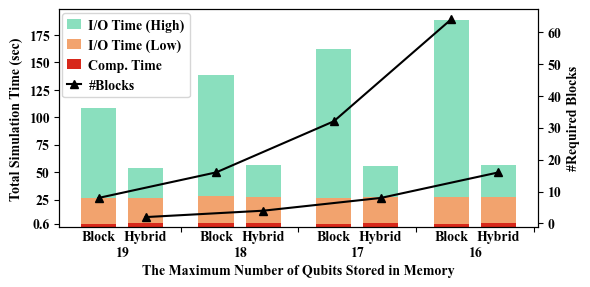

In [309]:
fname = 'HybridSimData.xlsx'
sheetname = 'MemQubits'
df = pd.read_excel(fname, sheet_name=sheetname)

# 重新构造数据以适应堆叠柱状图
stacked_blk = df.pivot(index='#MemQubits', columns='Metrics', values=['BlockSim']).drop(columns=[('BlockSim', 'Sim T.')])
stacked_hyb = df.pivot(index='#MemQubits', columns='Metrics', values=['HybridSim']).drop(columns=[('HybridSim', 'Sim T.')])

delta = 3
stacked_blk[('BlockSim', 'Comp T.')] += delta
stacked_hyb[('HybridSim', 'Comp T.')] += delta
stacked_blk[('BlockSim', 'Low I/O T.')] -= delta
stacked_hyb[('HybridSim', 'Low I/O T.')] -= delta

MemQubits = df['#MemQubits'].unique()
stack_order = ['Comp T.', 'Low I/O T.', 'High I/O T.'] # 堆叠顺序

stacked_blk = stacked_blk.reindex(index=MemQubits, columns=stack_order, level=1)
stacked_hyb = stacked_hyb.reindex(index=MemQubits, columns=stack_order, level=1)

# 创建画布和子图
fig, ax = plt.subplots(figsize=(6, 3))

yticks = list(np.arange(0, 201, 25))
yticks[0] = delta
ylabel = list(np.arange(0, 201, 25))
ylabel[0] = 0.6

# 设置纵坐标
ax.set_yticks(yticks, ylabel)

# 设置柱状图的宽度
bar_width = 0.3
space = 0.1

# 获取横坐标的数量
num_x = len(MemQubits)

# 生成每个横坐标的位置
index = np.arange(num_x)

# 绘制BlockSim的柱状图
ax.bar(index, stacked_blk[('BlockSim', 'High I/O T.')], 
       bar_width, label='I/O Time (High)', color=colors['iohigh'], edgecolor=colors['edge'], 
       bottom=stacked_blk[('BlockSim', 'Low I/O T.')]+stacked_blk[('BlockSim', 'Comp T.')])
ax.bar(index, stacked_blk[('BlockSim', 'Low I/O T.')], 
       bar_width, label='I/O Time (Low)', color=colors['iolow'], edgecolor=colors['edge'], 
       bottom=stacked_blk[('BlockSim', 'Comp T.')])
ax.bar(index, stacked_blk[('BlockSim', 'Comp T.')], 
       bar_width, label='Comp. Time', color=colors['comp'], edgecolor=colors['edge'])

# 绘制HybridSim的柱状图
ax.bar(index + bar_width + space, stacked_hyb[('HybridSim', 'High I/O T.')], 
       bar_width, color=colors['iohigh'], edgecolor=colors['edge'], 
       bottom=stacked_hyb[('HybridSim', 'Low I/O T.')]+stacked_hyb[('HybridSim', 'Comp T.')])
ax.bar(index + bar_width + space, stacked_hyb[('HybridSim', 'Low I/O T.')], 
       bar_width, color=colors['iolow'], edgecolor=colors['edge'], 
       bottom=stacked_hyb[('HybridSim', 'Comp T.')])
ax.bar(index + bar_width + space, stacked_hyb[('HybridSim', 'Comp T.')], 
       bar_width, color=colors['comp'], edgecolor=colors['edge'])

# 绘制BlockSim的分块数量
ax_numblocks = ax.twinx()
ax_numblocks.plot(index, [8, 16, 32, 64], color=colors['line'], label='#Blocks', marker='^')
ax_numblocks.plot(index + bar_width + space, [2, 4, 8, 16], color=colors['line'], marker='^')

# 设置横坐标标签
space2 = index[1] - index[0] - 2 * bar_width - space
ax.set_xticks(index + 1.5 * bar_width + space + space2 / 2, [])

# 设置横坐标的BlockSim和HybridSim标签
for i in range(num_x):
    ax.text(index[i], -fontsize-5, 'Block', ha='center', va='bottom', rotation=0)
    ax.text(index[i] + bar_width + space, -fontsize-5, 'Hybrid', ha='center', va='bottom', rotation=0)
    ax.text(index[i] + bar_width / 2 + space / 2, -2 * fontsize - 9, MemQubits[i], ha='center', va='bottom', rotation=0)

# 设置纵坐标标签
ax.set_ylabel('Total Simulation Time (sec)', fontsize=fontsize, fontweight='bold')
ax.set_xlabel('The Maximum Number of Qubits Stored in Memory', fontsize=fontsize, fontweight='bold')
ax.xaxis.set_label_coords(0.5, -0.17)
ax_numblocks.set_ylabel('#Required Blocks', fontsize=fontsize, fontweight='bold')

# 生成图例的句柄和标签
handles = []
labels  = []

barHandles, barLabels = ax.get_legend_handles_labels()
lineHandles, lineLabels = ax_numblocks.get_legend_handles_labels()
handles.extend(barHandles)
labels.extend(barLabels)
handles.extend(lineHandles)
labels.extend(lineLabels)

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1, 0.96), handlelength=1, handletextpad=0.5, fontsize=fontsize) # ncol=2, 

# 显示图形
plt.tight_layout()
plt.savefig(f'{sheetname}.pdf', format='pdf', bbox_inches='tight')
plt.show()

# The impact of the initial state vector

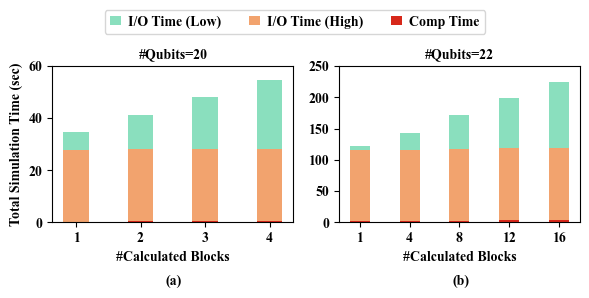

In [310]:
fname = 'HybridSimData.xlsx'
sheetname = 'InitSV'
df = pd.read_excel(fname, sheet_name=sheetname)

# 重新构造数据以适应堆叠柱状图
stacked = [df[df['#Qubits'] == 20].pivot(index='#CalBlocks', columns='Metrics', values=['HybridSim']).drop(columns=[('HybridSim', 'Sim T.')]),
           df[df['#Qubits'] == 22].pivot(index='#CalBlocks', columns='Metrics', values=['HybridSim']).drop(columns=[('HybridSim', 'Sim T.')])
           ]

numQubits = df['#Qubits'].unique()
stack_order = ['Comp T.', 'High I/O T.', 'Low I/O T.'] # 堆叠顺序

handles = []
labels  = []

fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=False) # sharey

# 设置柱状图的宽度
bar_width = 0.4

for i, ax in enumerate(axes):
    stacked_df = stacked[i].reindex(columns=stack_order, level=1)
    # print(stacked_df)

    index = np.arange(len(stacked_df.index))
    ax.set_xticks(index, stacked_df.index)

    # 绘制柱状图
    ax.bar(index, stacked_df[('HybridSim', 'Low I/O T.')], 
        bar_width, label='I/O Time (Low)', color=colors['iohigh'], 
        bottom=stacked_df[('HybridSim', 'High I/O T.')]+stacked_df[('HybridSim', 'Comp T.')])
    
    ax.bar(index, stacked_df[('HybridSim', 'High I/O T.')], 
        bar_width, label='I/O Time (High)', color=colors['iolow'], 
        bottom=stacked_df[('HybridSim', 'Comp T.')])
    
    ax.bar(index, stacked_df[('HybridSim', 'Comp T.')], 
        bar_width, label='Comp Time', color=colors['comp'])
    

    # subgraph titles
    ax.set_title(f'#Qubits={numQubits[i]}', fontsize=fontsize, fontweight='bold')
    
    ax.set_xlabel('#Calculated Blocks', fontsize=fontsize, fontweight='bold')
    
    # mark the number in the lower center of the first subgraph in each row
    label = f'({string.ascii_lowercase[i]})'
    ax.text(0.47, -0.4, label, transform=ax.transAxes, fontsize=fontsize)

    if i == 0:
        # labels
        barHandles, barLabels = ax.get_legend_handles_labels()
        handles.extend(barHandles)
        labels.extend(barLabels)

        ax.set_yticks(list(np.arange(0, 61, 20)))
        ax.set_ylabel('Total Simulation Time (sec)', fontsize=fontsize, fontweight='bold')
    else:
        ax.set_yticks(list(np.arange(0, 251, 50)))

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=fontsize, handlelength=0.8, handletextpad=0.5)

plt.tight_layout()
# plt.subplots_adjust(wspace=0)

plt.savefig(f'{sheetname}.pdf', format='pdf', bbox_inches='tight')
plt.show()
